<a href="https://colab.research.google.com/github/YashwantRaul/Supervised-ML-Classification/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

#**Importing Libraries and Loading Dataset**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#file path reading or csv upload to coolab from drive (seperated = ;)
file_path='/content/drive/MyDrive/Almabetter/Capstone Project/Project3-Supervised ML(Classification)/Bank Marketing Effectiveness Prediction-Yashwant Raul/bank-full.csv'     
data=pd.read_csv(file_path, sep = ";")

#**Exploring Dataset And Understanding More About The Data**

In [14]:
#checking top 5 rows of dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### We can see that all columns are in proper format in our dataset. so we dont need to do Formating.

In [17]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


###**Handling missing and duplicate values**

In [18]:
#checking null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

###There are no null values in the given dataset.

In [19]:
#check for duplicate rows
data.duplicated().value_counts()

False    45211
dtype: int64

###There are no duplicate row in our dataset.

In [20]:
#creating copy of dataset before working with it so that we can have original data untouched
df = data.copy()

###**Check columns and their Unique Values**

In [21]:
#check the column names 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
for column in df.columns:
  print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


#**Exploratory Data Analysis Of Dataset** 

##**Analysis Of Categorical Features**

In [24]:
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [25]:
for feature in categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))  

the feature is job and number of categories are 12
the feature is marital and number of categories are 3
the feature is education and number of categories are 4
the feature is default and number of categories are 2
the feature is housing and number of categories are 2
the feature is loan and number of categories are 2
the feature is contact and number of categories are 3
the feature is month and number of categories are 12
the feature is poutcome and number of categories are 4
the feature is y and number of categories are 2


### There are 9 Categorical features.
### Job and Month has more categorical values.

In [26]:
df[categorical_features].head(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,yes,yes,unknown,may,unknown,no
7,entrepreneur,divorced,tertiary,yes,yes,no,unknown,may,unknown,no
8,retired,married,primary,no,yes,no,unknown,may,unknown,no
9,technician,single,secondary,no,yes,no,unknown,may,unknown,no


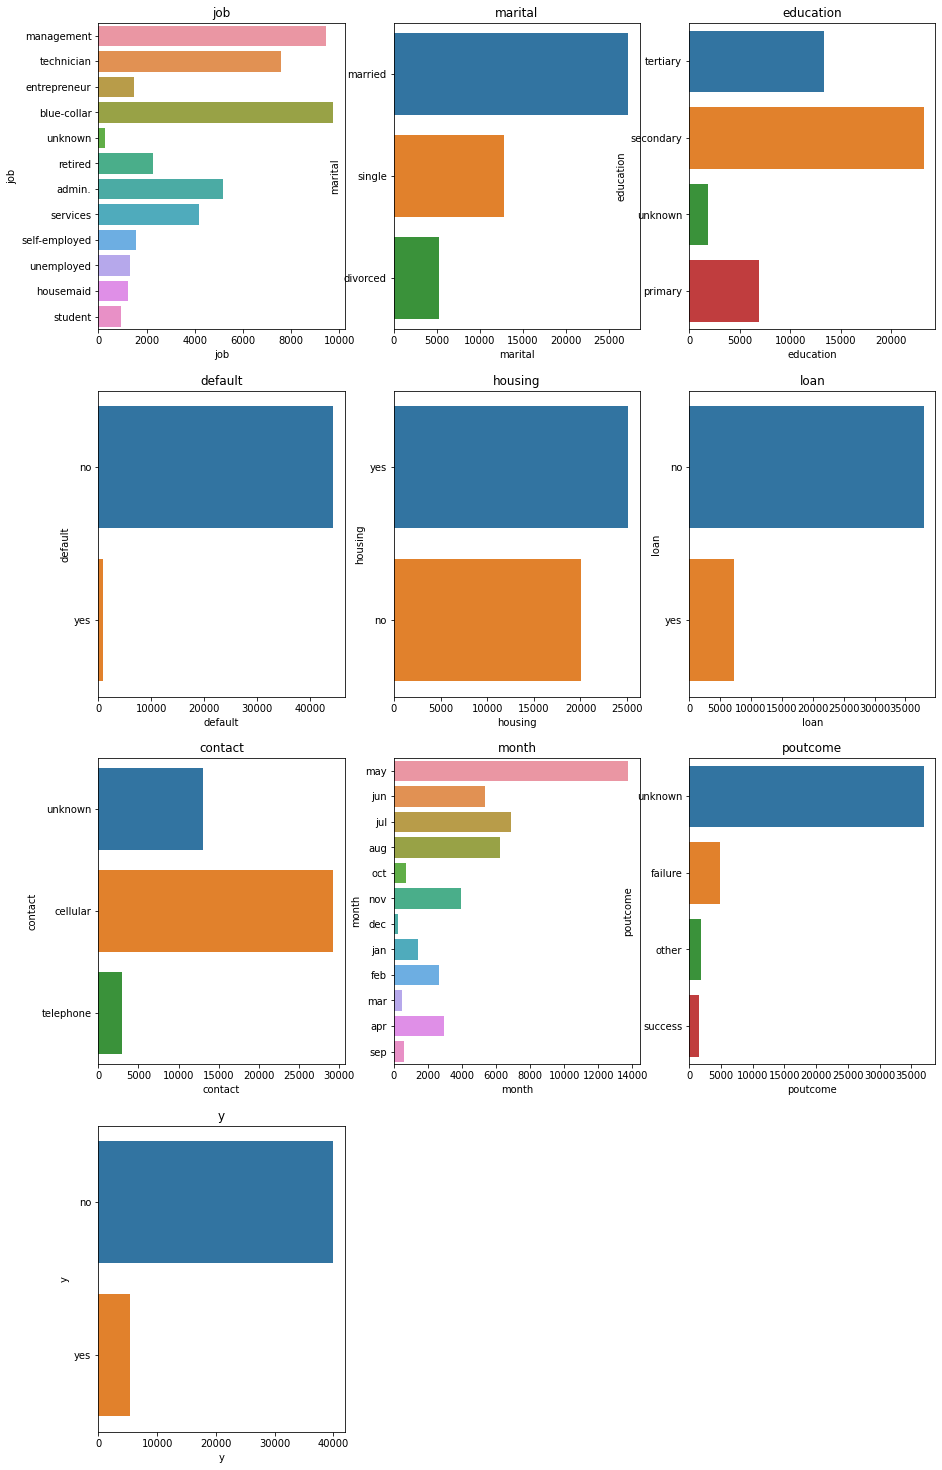

In [27]:
#check count on categorical features
plt.figure(figsize=(15,80))
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=df)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+= 1
plt.show()  


### Management and blue-collar has the highest distribution and Housemaid and students has the lowest.

###We have maximum data of married people*

###Secondary and tertiory education background clients are highest in the dataset.

###Client who has no credit in default is maximum and who has is very low  near to 1 %.

###Client with No personal loan are more in dataset.

###Previous outcome is unknown in maximum cases might be the because there was no proper reason given for the same.

###We have maximum data available for the month of May, june, july and august and very less in Dec.

###Y which is our target variable : we can see there are more no results than yes.

###As it is classification problem and we have class imbalance which is the problem we have to solve this class imbalance before training model.

###**Relationship between Categorical feature and Target Variable**

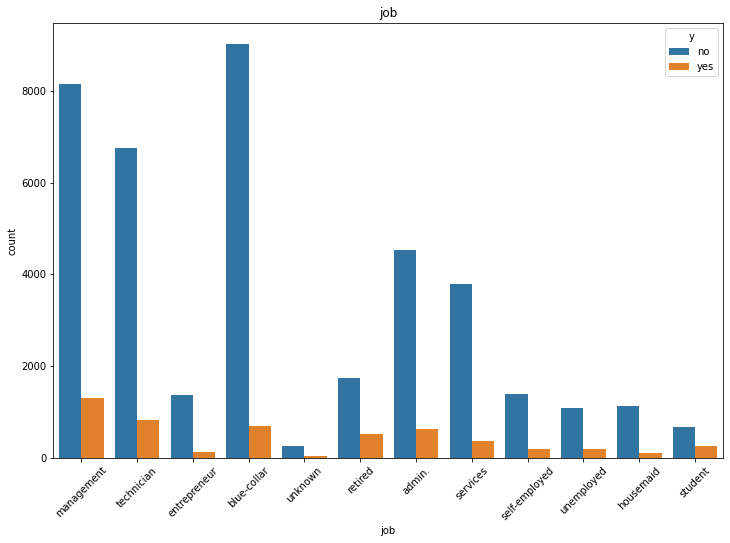

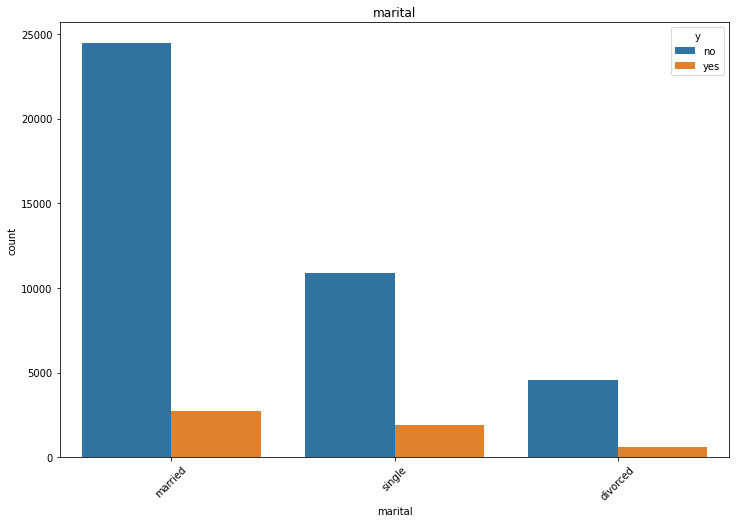

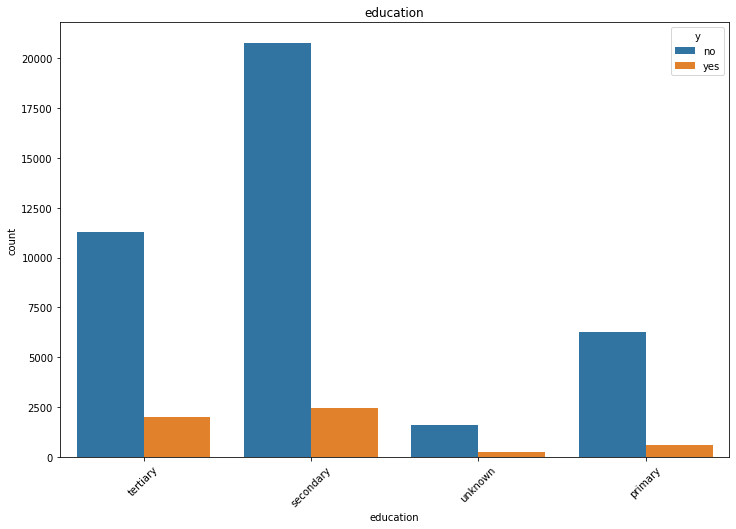

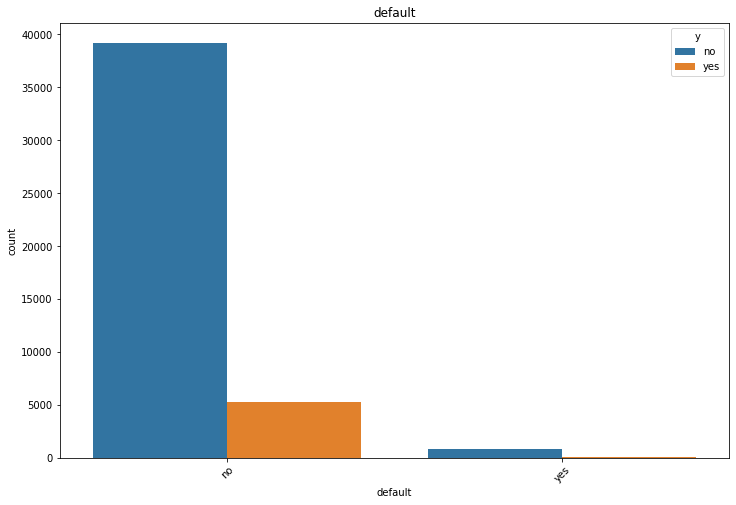

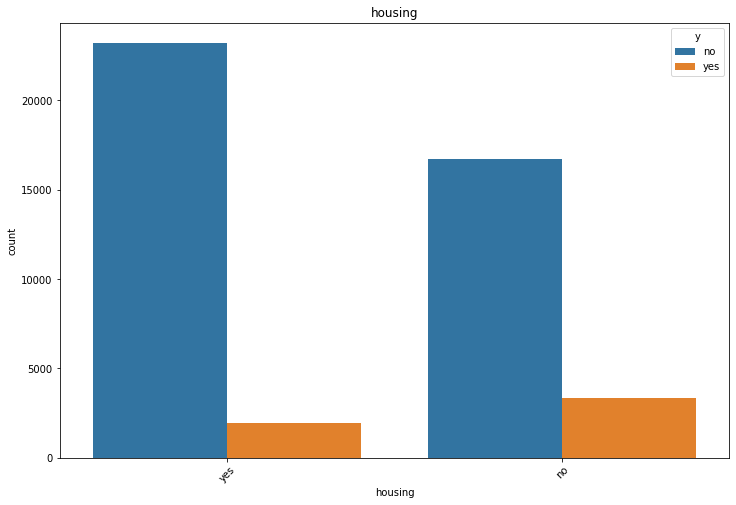

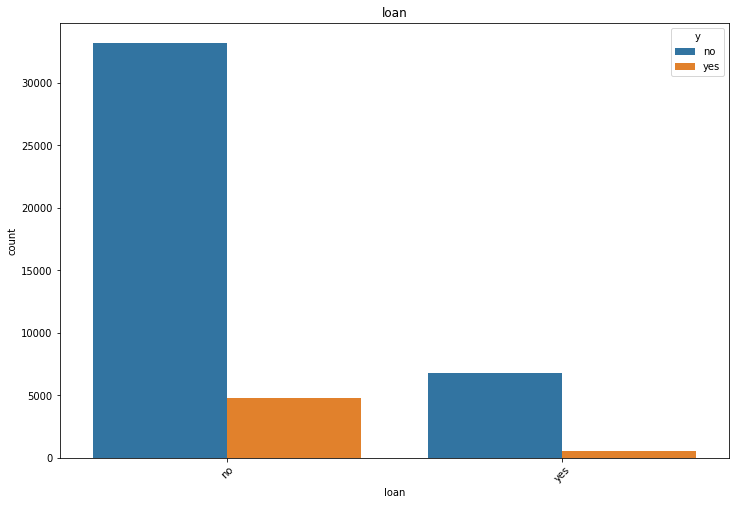

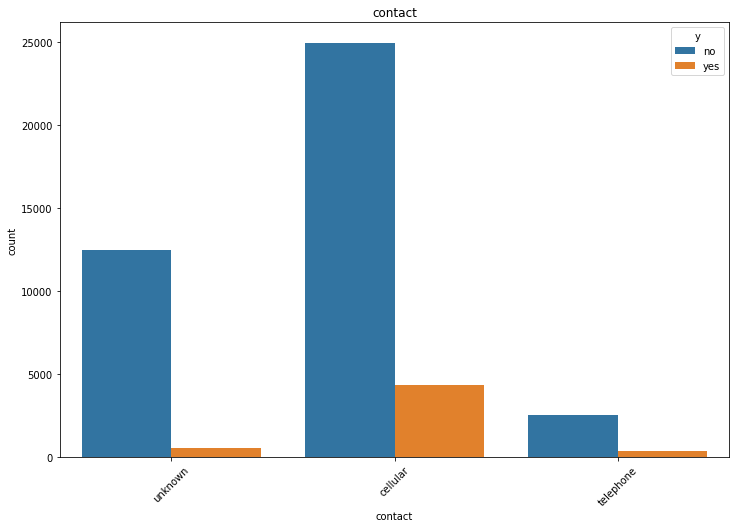

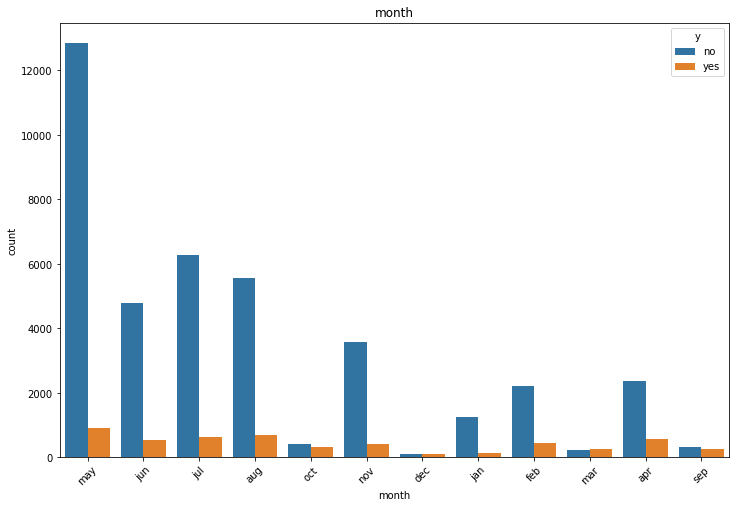

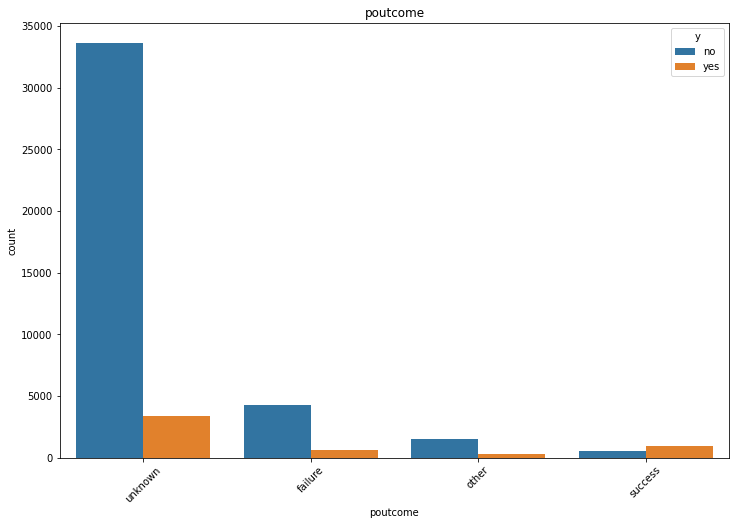

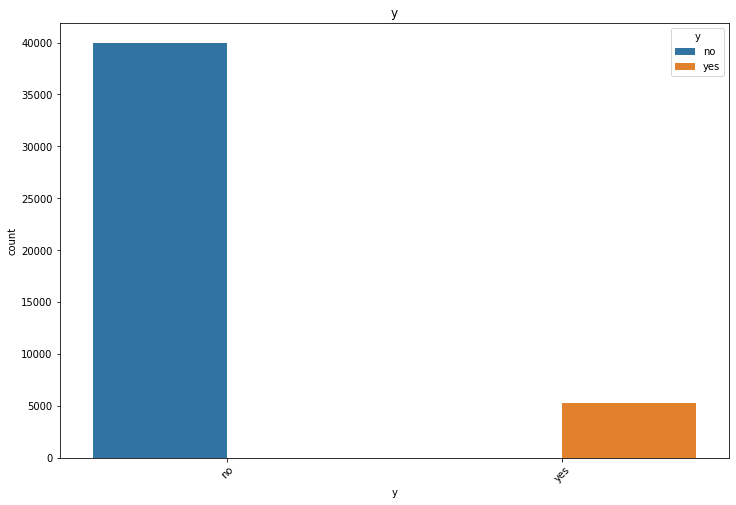

In [28]:
#now let's check relation between cat feature and outcome variable but first we have to drop our outcome variable from categorical columns
#cat_features= categorical_features.drop('y',axis=1)
for cat in categorical_features:
  plt.figure(figsize=(12,8))
  sns.countplot(cat,hue='y',data=df)
  plt.xlabel(cat)
  plt.xticks(rotation=45)
  plt.title(cat)

###Clients who has housing loan seems to be not interested much on deposit.
###If pre campagin outcome(i-e poutcome)=success then, there is high chance of client to show interest on term deposit.
###Married and Single have more intrest in deposite.
###Cellular communication is more effective in comparison to other communication types.

##**Analysis of Numerical Features**

In [29]:
#list of Numerical Variables
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O' )]
print('Number of Numerical variables:', len(numerical_features))

#Visualise the numerical variables
df[numerical_features].head()

Number of Numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


###There are 7 Numerical Features.

In [30]:
#find discrete numerical feature
dis_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("discrete variable count: {} ".format(len(dis_feature)))


discrete variable count: 0 



###There is no any discrete variable in given dataset.

In [31]:
#find contineous numerical feature
con_feature= [feature for feature in numerical_features if feature not in dis_feature+['y'] ]
print('contineous variable count:{}'.format(len(con_feature)))

contineous variable count:7



###There are 7 contineous variable in given dataset.

###**Distribution of data**

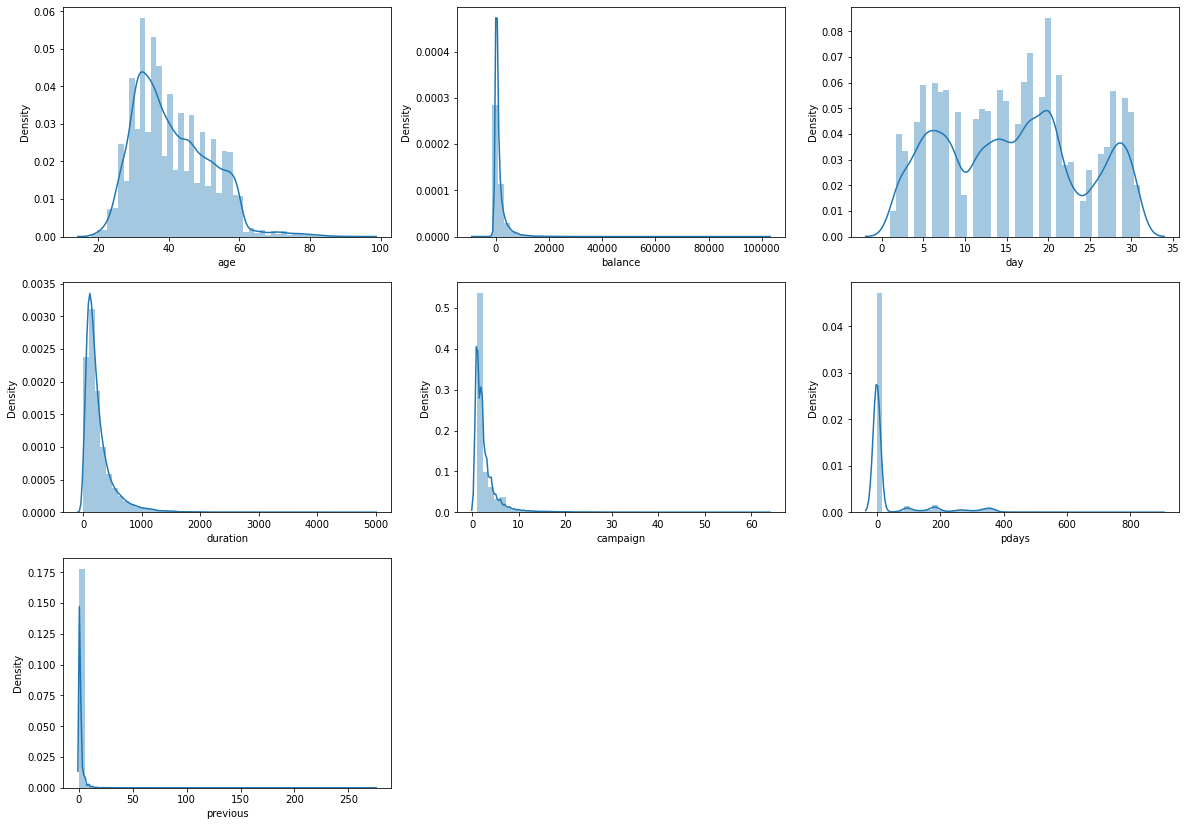

In [32]:
#plot a univariate distribution of observations
plt.figure(figsize=(20,60),facecolor='white')
plotnumber =1
for contineous_features in con_feature :
  ax = plt.subplot(12,3,plotnumber)
  sns.distplot(df[contineous_features])
  plt.xlabel(contineous_features)
  plotnumber+= 1
plt.show()  

###It seems age and days are Normally distributed.
###Balance, Duration, Campaign, pdays and previous are skewed towards right and seems to have some outliers.

###**Relation between Numerical feature  and Target Variable**

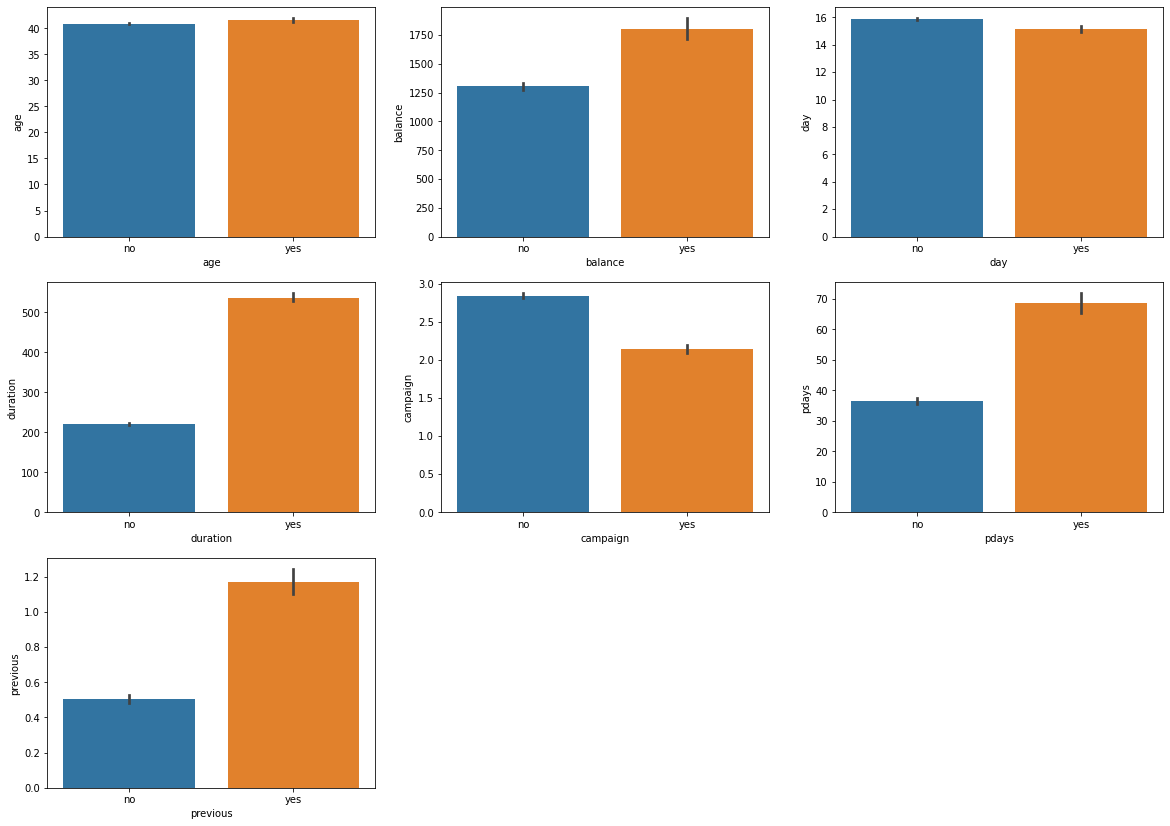

In [33]:
#Box plot to show target distribution with respect to numerical features.
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in con_feature:
  ax = plt.subplot(12,3,plotnumber)
  sns.barplot(x="y", y= df[feature], data=df)
  plt.xlabel(feature)
  plotnumber+= 1
plt.show()  


###Client shows interest on response(term deposit) who had discussion for longer duration
###Calls with large duration has more tendency for conversion
###People were mostly contacted once but also some people also connect more number of time.